In [16]:
import json
import pandas as pd
from collections import defaultdict, Counter


root = "/home/vicente/Github/NLP-PubMed/dataset/training-set-100000.json"

with open(root, "r") as f:
    data = json.load(f)
    articles = data["articles"]


#a data frame where each row is a word 
term_journal = defaultdict(Counter)
for article in articles:
    j = article["journal"]
    for term in article["meshMajor"]:
        term_journal[term][j] += 1

rows = []
for term, count in term_journal.items():
    total = sum(count.values())
    top_journal, top_journal_count = count.most_common(1)[0]
    rows.append({
        "word": term,
        "count": total,
        "journal": top_journal,
        "in_that_journal": top_journal_count
    })


words_df = pd.DataFrame(rows).sort_values("count", ascending=False).reset_index(drop=True)

display(words_df.shape)
display(words_df.head(10))
print("Unique journals:", words_df["journal"].nunique())

# Save the DataFrame to a CSV file
words_df.to_csv("mesh_major_journal.csv", index=False)

(22373, 4)

,word,count,journal,in_that_journal
0,Humans,61956,The Journal of biological chemistry,1341
1,Male,37543,The American journal of physiology,447
2,Female,37301,Cancer,417
3,Animals,33144,The Journal of biological chemistry,1812
4,Adult,22688,Cancer,292
5,Middle Aged,20922,Cancer,345
6,Aged,14980,Cancer,279
7,Mice,10940,The Journal of biological chemistry,671
8,Rats,8500,The Journal of biological chemistry,518
9,Adolescent,8491,The Journal of clinical endocrinology and meta...,99


Unique journals: 1160


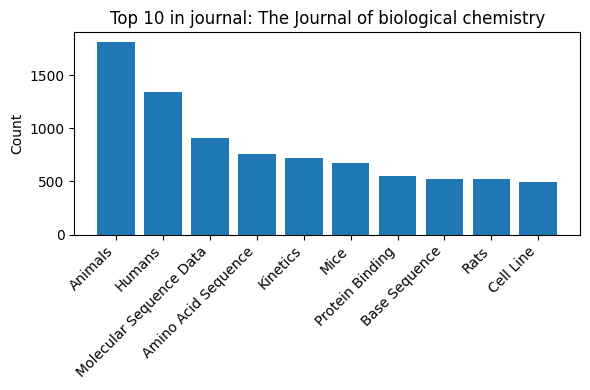

<Figure size 640x480 with 0 Axes>

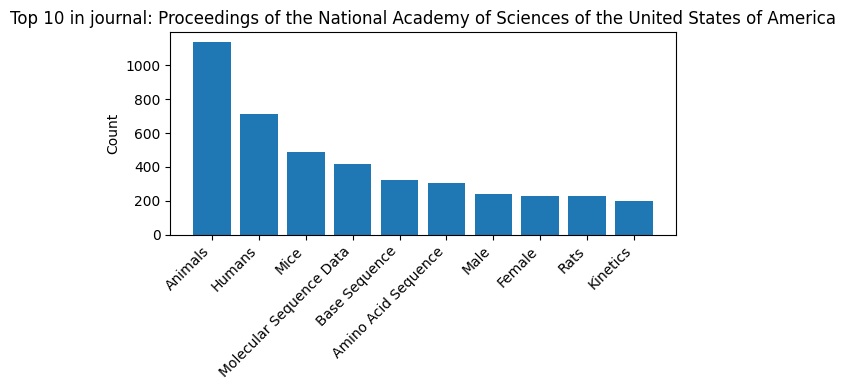

<Figure size 640x480 with 0 Axes>

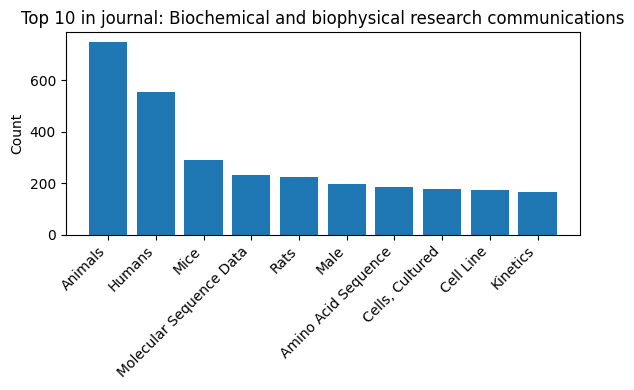

<Figure size 640x480 with 0 Axes>

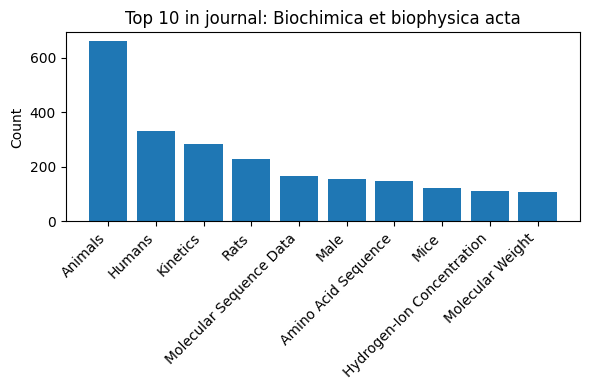

<Figure size 640x480 with 0 Axes>

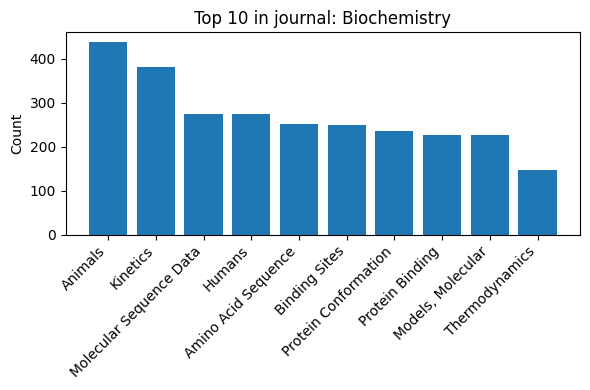

<Figure size 640x480 with 0 Axes>

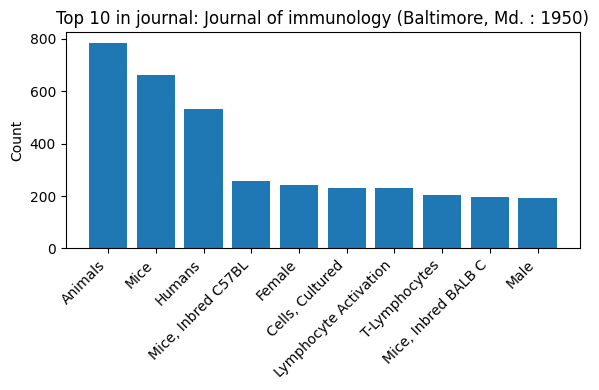

<Figure size 640x480 with 0 Axes>

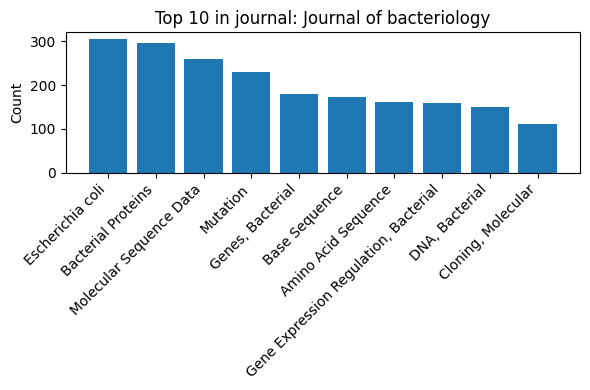

<Figure size 640x480 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
plots = "/home/vicente/Github/NLP-PubMed/plots/"
journal_count = Counter()
for art in articles:
    journal = art["journal"]
    journal_count[journal] += 1

top7 = []
for journal, _ in journal_count.most_common(7):
    top7.append(journal)

journal_term_counts = defaultdict(Counter)
for art in articles:
    journal = art["journal"]
    terms = art["meshMajor"]
    for term in terms:
        journal_term_counts[journal][term] += 1
counter_temp=0
for journal in top7:
    most_common_10 = journal_term_counts[journal].most_common(10)
    terms = []
    counts = []
    for item in most_common_10:
        terms.append(item[0])
        counts.append(item[1])

    counter_temp+=1

    
    plt.figure(figsize=(6, 4))
    plt.bar(terms, counts)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Count")
    plt.title(f"Top 10 in journal: {journal}")
    plt.tight_layout()
    plt.show()
    #save to ploits/
    plt.savefig(f"{plots}/{counter_temp}.png")


